In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [3]:
# Spam vs Ham!

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print len(messages)

5574


In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
for mess_no, message in enumerate(messages[:10]):
    print mess_no, message
    print "\n"

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
import pandas as pd

In [9]:
mess_df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [10]:
mess_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
mess_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
# higher level view of this data
mess_df.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [13]:
# feature engineering, based on Domain knowledge!!!!

In [14]:
mess_df['length'] = mess_df['message'].apply(lambda x: len(x))

In [15]:
mess_df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

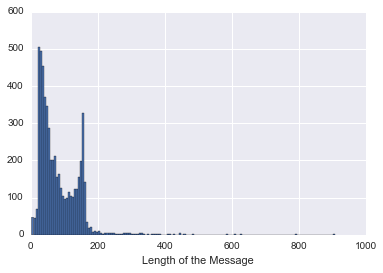

In [19]:
mess_df['length'].hist(bins = 150)
# bimodal distribution
plt.xlabel('Length of the Message')

In [20]:
mess_df['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
mess_df[mess_df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bc1c450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bc45cd0>], dtype=object)

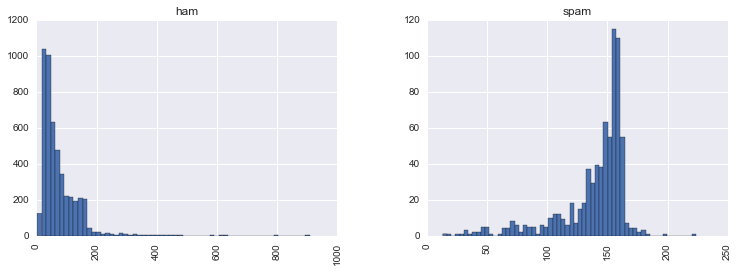

In [22]:
mess_df.hist(column = 'length', by = 'label', bins = 60, figsize = (12, 4))
# however, the yaxis for ham is showing much larger number than the spam!

In [23]:
# bag of words
# convert a sequence of words to a sequence of vectors

In [24]:
import string

In [25]:
mess = 'Sample Message! Notice: it has punctuation.'

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
nopunc = [c for c in mess if c not in string.punctuation]

In [28]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [31]:
nopunc = ''.join(nopunc)

In [32]:
nopunc

'Sample Message Notice it has punctuation'

In [33]:
x = ['a', 'b', 'c', 'd']

In [34]:
''.join(x)

'abcd'

In [35]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [36]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
clean_mess #<-- just keep the most important words in the mess

['Sample', 'Message', 'Notice', 'punctuation']

In [39]:
def text_process(mess):
    # first remove punctuations
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    # second remove stopwords
    # return clean words
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [40]:
mess_df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Text normalization, and the short hand text...

### Convert the tokens to vectors for the texts, that ML algorithm can understand then~~~

In [41]:
# create a matrix, rows are the entire vocabulary, and cols are the messages... the value in each cell is the counts for each word to show up in each message

In [42]:
# Sparse Matrix!

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(mess_df['message'])

/Users/miaojun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [46]:
print len(bow_transformer.vocabulary_)

11425


In [47]:
mess4 = mess_df['message'][3]

In [48]:
print mess4

U dun say so early hor... U c already then say...


In [49]:
bow4 = bow_transformer.transform([mess4])

In [51]:
print bow4

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [52]:
bow4.shape

(1, 11425)

In [53]:
bow_transformer.get_feature_names()[4068] #<-- use the index to grab the word

'U'

In [54]:
mess_bow = bow_transformer.transform(mess_df['message'])

/Users/miaojun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [55]:
print 'Shape of the Sparse Matrix: ', mess_bow.shape

Shape of the Sparse Matrix:  (5572, 11425)


In [56]:
mess_bow.nnz #<--- the Non zero messages

50548

In [80]:
sparsity = 100.00*mess_bow.nnz /(mess_bow.shape[0]*mess_bow.shape[1])
print 'Sparsity: {}'.format(sparsity)

Sparsity: 0.0794029541267


## TF-IDF

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

In [82]:
tfidf_transformer = TfidfTransformer().fit(mess_bow)

In [83]:
tfidf_4 = tfidf_transformer.transform(bow4)

In [84]:
print tfidf_4
# weight value for each of the word in the corpus

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [86]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [87]:
mess_tfidf = tfidf_transformer.transform(mess_bow)

In [88]:
print mess_tfidf[:5]

  (0, 11163)	0.230266855924
  (0, 10965)	0.190734285451
  (0, 8917)	0.247046523768
  (0, 8336)	0.170468692922
  (0, 7668)	0.264033840655
  (0, 7555)	0.312538562607
  (0, 6937)	0.183469241361
  (0, 6906)	0.151584746647
  (0, 6217)	0.189155577328
  (0, 5769)	0.24984711893
  (0, 5218)	0.268705938625
  (0, 5217)	0.298351840882
  (0, 4653)	0.312538562607
  (0, 2060)	0.242039602564
  (0, 1483)	0.312538562607
  (0, 1110)	0.288286201631
  (1, 11072)	0.400615609824
  (1, 10698)	0.206363748132
  (1, 8590)	0.504340590131
  (1, 7701)	0.376740107081
  (1, 3064)	0.291199541124
  (1, 2451)	0.561988811929
  (2, 11123)	0.191043872205
  (2, 11084)	0.158981453472
  (2, 10686)	0.139955408208
  :	:
  (2, 3953)	0.154401563287
  (2, 2804)	0.175241941043
  (2, 1941)	0.152658172923
  (2, 1833)	0.450772620886
  (2, 1551)	0.217782344313
  (2, 871)	0.211884249961
  (2, 443)	0.217782344313
  (2, 430)	0.217782344313
  (2, 423)	0.0963917091981
  (2, 73)	0.225386310443
  (3, 9554)	0.538562626293
  (3, 7186)	0.4389365

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
spam_detect_m = MultinomialNB().fit(mess_tfidf, mess_df['label'])

In [92]:
spam_detect_m.predict(tfidf_4)[0]

'ham'

In [95]:
mess_df.iloc[3]['label']

'ham'

In [97]:
# looks like the model predict right wait... the data set is not split!!!!

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
msg_train, msg_test, label_train, label_test = train_test_split(mess_df['message'], mess_df['label'], test_size = 0.3, random_state = 101)

In [100]:
msg_train.head()

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
Name: message, dtype: object

In [101]:
# pipeline of the workflow!!!!

In [102]:
from sklearn.pipeline import Pipeline

In [103]:
pipeline = Pipeline(steps=[
        ('bow', CountVectorizer(analyzer= text_process)),
        ('tfidf', TfidfTransformer()),
        ('Classifier', MultinomialNB())
    ])

In [104]:
pipeline.fit(msg_train, label_train)

/Users/miaojun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11af03a28>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...         use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [105]:
pred_p = pipeline.predict(msg_test)

/Users/miaojun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [106]:
from sklearn.metrics import classification_report

In [107]:
print classification_report(label_test, pred_p)

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1475
       spam       1.00      0.65      0.79       197

avg / total       0.96      0.96      0.96      1672



In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
pipeline_2 = Pipeline(steps=[
        ('bow', CountVectorizer(analyzer= text_process)),
        ('tfidf', TfidfTransformer()),
        ('Classifier', RandomForestClassifier())
    ])

In [110]:
pipeline_2.fit(msg_train, label_train)

/Users/miaojun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11af03a28>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [111]:
pred_p_2 = pipeline_2.predict(msg_test)

/Users/miaojun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [112]:
print classification_report(label_test, pred_p_2)

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1475
       spam       0.98      0.72      0.83       197

avg / total       0.97      0.97      0.96      1672

